In [1]:
!pip install mtcnn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
img = cv.imread("C:/Users/Admin/Documents/MTechProject/PROJ/Images/Images/ARIJIT SINGH.png")
# opencv BGR channel format and plt reads images as RGB channel format

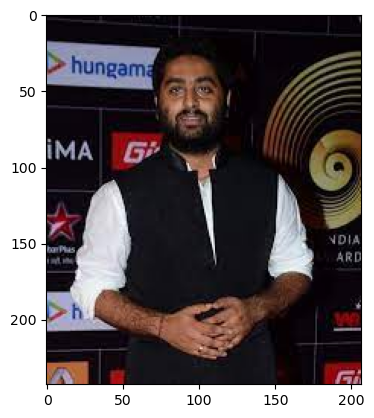

In [4]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB 

In [5]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)



1/1 [==============================] - 0s 233ms/step


In [6]:
results

[{'box': [76, 29, 38, 52],
  'confidence': 0.9999676942825317,
  'keypoints': {'left_eye': (86, 49),
   'right_eye': (103, 49),
   'nose': (95, 58),
   'mouth_left': (88, 69),
   'mouth_right': (103, 68)}}]

In [7]:
x,y,w,h = results[0]['box']

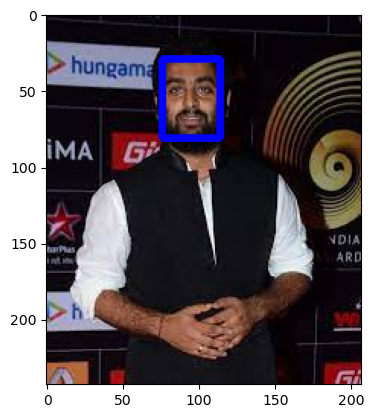

In [8]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 3)
plt.imshow(img)

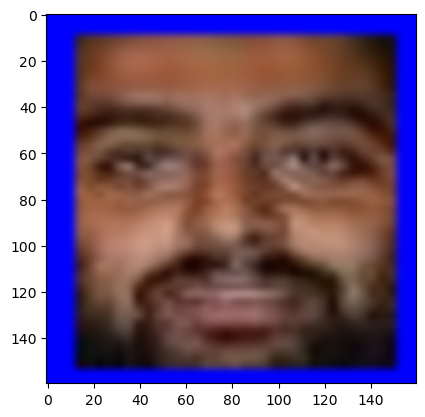

In [9]:
from scipy.signal import convolve2d, fftconvolve
from scipy.signal import wiener
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160 
my_face = cv.resize(my_face, (160,160))
blurred_face = cv.GaussianBlur(my_face, (5, 5), 0)
face_arr = cv.resize(blurred_face,(160,160))
plt.imshow(face_arr)

In [10]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [12]:
# Load and preprocess face data
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x, y, w, h = self.detector.detect_faces(img)[0]['box']
        x, y = abs(x), abs(y)
        face = img[y:y + h, x:x + w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = os.path.join(dir, im_name)
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = os.path.join(self.directory, sub_dir)
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)

    def plot_images(self):
        plt.figure(figsize=(18, 16))
        for num, image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y) // ncols + 1
            plt.subplot(nrows, ncols, num + 1)
            plt.imshow(image)
            plt.axis('off')


In [14]:
faceloading = FACELOADING("C:/Users/Admin/Documents/MTechProject/PROJ/genki4k")
#faceloading = FACELOADING("C:/Users/Admin/Documents/MTechProject/PROJ/lfw-deepfunneled")
X, Y = faceloading.load_classes()

2/2 [==============================] - 0s 4ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


2/2 [==============================] - 0s 4ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


2/2 [==============================] - 0s 4ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


2/2 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


2/2 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step


2/2 [==============================] - 0s 4ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 30ms/step


2/2 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


2/2 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


2/2 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


2/2 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 30ms/step
Loaded successfully: 3990


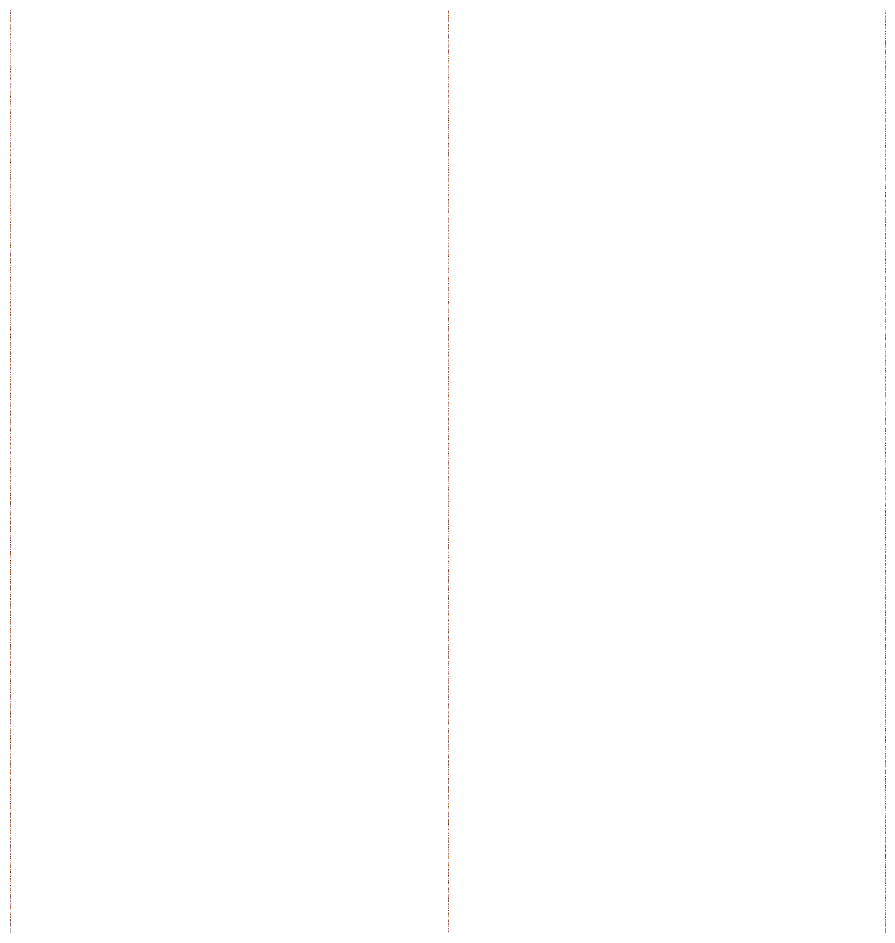

In [16]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

In [17]:
!pip install keras-facenet


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 82ms/step


In [20]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

Text(0, 0.5, '0')

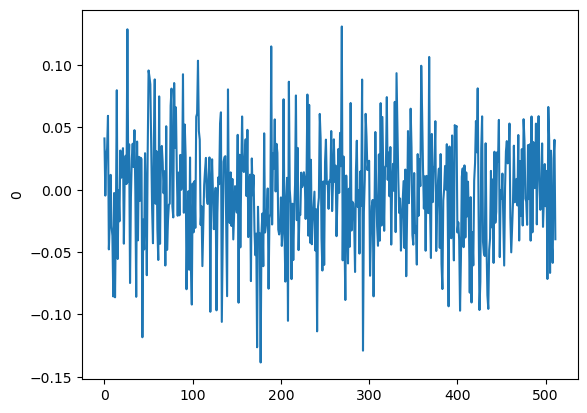

In [22]:
plt.plot(EMBEDDED_X[0]) 
plt.ylabel(Y[0])

In [23]:
Y 

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [25]:
from sklearn.metrics import accuracy_score
import cv2 as cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming you have X_train, Y_train, X_test, Y_test, detector defined

# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_model.fit(X_train, Y_train)

# Predictions on the training set
ypreds_train = knn_model.predict(X_train)

# Predictions on the test set
ypreds_test = knn_model.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(Y_train, ypreds_train)
accuracy_test = accuracy_score(Y_test, ypreds_test)

print(f"Accuracy on training set: {accuracy_train}")
print(f"Accuracy on test set: {accuracy_test}")

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy on training set: 1.0
Accuracy on test set: 1.0


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
import pickle
#save the model
with open('knn_model_160x160.pkl','wb') as f:
    pickle.dump(knn_model,f)

In [29]:
import cv2
import numpy as np

# Assuming you have the FaceNet model (facenet_model) and the trained KNN model (knn_model)

# Load and preprocess the test image
test_image_path = "C:/Users/Admin/Documents/MTechProject/PROJ/Amey_Thorat_0002.jpg"
test_image = cv2.imread(test_image_path)
test_image_rgb = cv.cvtColor(test_image, cv.COLOR_BGR2RGB)  # Ensure RGB format
# Perform any necessary additional preprocessing steps

# Extract features using the FaceNet model
test_features = EMBEDDED_X.predict(preprocess_image(test_image_rgb, target_size=(160, 160)))

# Reshape features to match the expected input dimensions of the KNN model
test_features_reshaped = test_features.flatten().reshape(1, -1)

# Predict using the trained KNN model
prediction = knn_model.predict(test_features_reshaped)

print(f"Predicted label for the test image: {prediction}")


AttributeError: 'numpy.ndarray' object has no attribute 'predict'